<a href="https://colab.research.google.com/github/merhoo/Bash-Linux-Stuff/blob/master/WeCode_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import itertools
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import statsmodels.api as sm #Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import log_loss, accuracy_score, r2_score, confusion_matrix

In [0]:
# upload data. Hint: Google Pandas csv.
df = # fill in here #
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


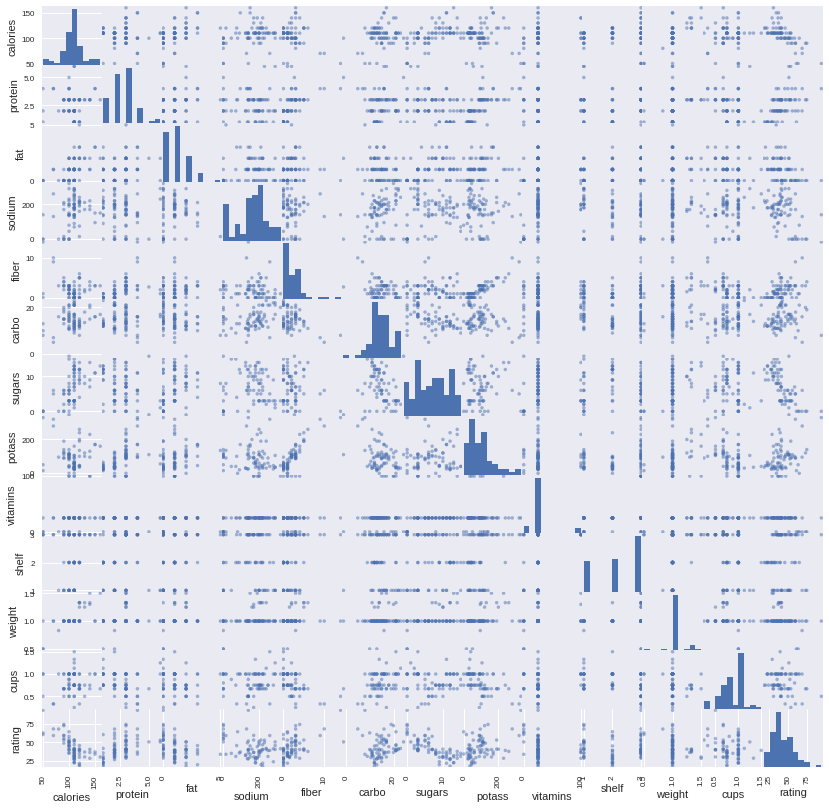

In [0]:
# Use the scatter_matrix function. Set figsize=(14, 14).

# fill in here #
plt.show();

What do you notice about the scatter plot? Any correlation between features or anything interesting about the feature distributions? What can we do about that?

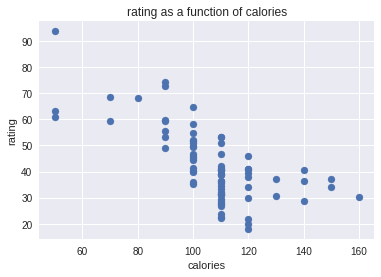

In [0]:
# Make a scatter plot of the calories (x axis) versus the rating (y axis) 
# using matplotlib. Make sure to include axis labels and a title.

# fill in here #
plt.show();

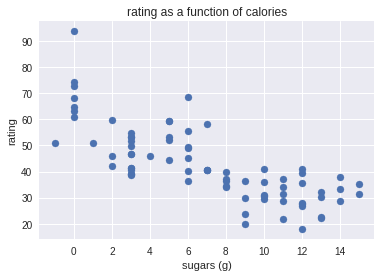

In [0]:
# Do the same for sugars vs rating.

# fill in here #
plt.show();

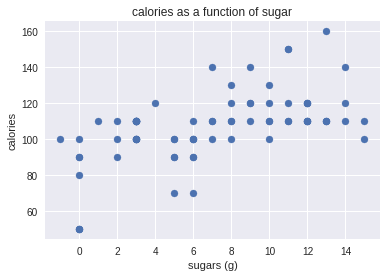

In [0]:
# what about sugar (x axis) versus calories?

In [0]:
# look at the data types of the features in our dataset. Anything interesting?
df.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [0]:
# one hot encoding because sklearn can't handle categorical features in one column.
augmented = pd.get_dummies(df, columns=['type', 'mfr'], drop_first=True)

# note that I'm dropping the target variable to form X_train and the name column
# because it's not useful, it's just identifying information.
X_train, X_test, y_train, y_test = train_test_split(augmented.drop(['rating', 'name'], axis=1), df['rating'], test_size=0.2, random_state=42)
display(X_train.head())
display(X_test.head())
print(X_train.shape, X_test.shape)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,type_H,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R
9,90,3,0,210,5.0,13.0,5,190,25,3,1.0,0.67,0,0,0,0,1,0,0
5,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,0,1,0,0,0,0,0
34,120,3,3,75,3.0,13.0,4,100,25,3,1.0,0.33,0,0,0,0,1,0,0
22,100,2,1,140,2.0,11.0,10,120,25,3,1.0,0.75,0,1,0,0,0,0,0
30,100,2,0,45,0.0,11.0,15,40,25,1,1.0,0.88,0,0,0,0,1,0,0


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,type_H,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,0,0,0,0,0,0,1
35,120,1,2,220,1.0,12.0,11,45,25,2,1.0,1.00,0,0,0,0,0,1,0
10,120,1,2,220,0.0,12.0,12,35,25,2,1.0,0.75,0,0,0,0,0,1,0
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,0,0,0,1,0,0,0
45,150,4,3,150,3.0,16.0,11,170,25,3,1.0,1.00,0,0,0,0,0,0,1


(61, 19) (16, 19)


In [0]:
# Regression problem: Predict score.
# What might be some useful predictors? I would guess sugar and fat content 
# and possibly shelf and brand.

# let's fit a linear regression with all features. Use Statmodels.
# Remember to use sm.add_constant().
# Display a summary of the model.

reg = # fill in here #
results_sm = # fill in here #
results_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.236e+15
Date:                Fri, 01 Feb 2019   Prob (F-statistic):          7.54e-311
Time:                        23:16:15   Log-Likelihood:                 839.99
No. Observations:                  61   AIC:                            -1640.
Df Residuals:                      41   BIC:                            -1598.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.9272    6.5e-07   8.45e+07      0.000      54.927      54.927
calories      -0.2227   8.57e-09   -2.6e+07      0.000      -0.223      -0.223
protein        3.2732   5.94e-08   5.51e+07      0.000       3.273       3.273
fat           -1.6914   8.92e-08   -1.9e+07      0.000      -1.691      -1.691
sodium        -0.0545   8.47e-10  -6.43e+07      0.000      -0.054      -0.054
fiber          3.4435   6.67e-08   5.16e+07      0.000       3.443       3.443
carbo          1.0925   3.01e-08   3.63e+07      0.000       1.092       1.092
sugars        -0.7249   2.54e-08  -2.86e+07      0.000      -0.725      -0.725
potass        -0.0340   2.27e-09   -1.5e+07      0.000      -0.034      -0.034
vitamins      -0.0512   2.25e-09  -2.28e+07      0.000      -0.051      -0.051
shelf      -2.525e-08   7.42e-08     -0.340      0.735   -1.75e-07    1.25e-07
weight      5.265e-07   8.18e-07      0.644      0.523   -1.12e-06    2.18e-06
cups        1.549e-07   2.34e-07      0.662      0.512   -3.18e-07    6.27e-07
type_H     -1.742e-07   3.94e-07     -0.442      0.660   -9.69e-07    6.21e-07
mfr_G       1.532e-07   5.92e-07      0.259      0.797   -1.04e-06    1.35e-06
mfr_K       1.867e-07   6.15e-07      0.303      0.763   -1.06e-06    1.43e-06
mfr_N       3.875e-07   5.04e-07      0.769      0.446   -6.31e-07    1.41e-06
mfr_P       4.536e-07   6.06e-07      0.748      0.458    -7.7e-07    1.68e-06
mfr_Q      -8.246e-09   5.65e-07     -0.015      0.988   -1.15e-06    1.13e-06
mfr_R       2.992e-07   5.83e-07      0.513      0.611   -8.78e-07    1.48e-06
==============================================================================
Omnibus:                        2.178   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.337   Jarque-Bera (JB):                1.379
Skew:                           0.024   Prob(JB):                        0.502
Kurtosis:                       2.265   Cond. No.                     8.43e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What can we tell from these coefficients?

In [0]:
# Let's use this model to predict the results on the test set. Remember to use sm.add_constant.
# Print the R^2 score.
y_pred = # Fill in here #
test_r2_score = # fill in here #
print(test_r2_score)

0.9999999999999994


,y_true,pred
4,34.384843,34.384843
35,21.871292,21.871292
10,18.042851,18.042851
0,68.402973,68.402973
45,34.139765,34.139764


In [0]:
# Let's run a linear regression with sklearn's LinearRegression.
# Fit the model and print the R^2 score based on the predictions from the test set.


# Fill in here #

0.9999999999999994


,y_true,pred
4,34.384843,34.384843
35,21.871292,21.871292
10,18.042851,18.042851
0,68.402973,68.402973
45,34.139765,34.139764


Now let's look at this data as a classification problem. Let's try to predict the brand of the cereal based on the nutritional information.

What might be some useful predictors? Again I would guess sugar and fat content, among other features.

In [0]:
# Using one hot encoding only on the type this time, since we'll need to convert
# mfr to be recognized as a categorical variable.
augmented_2 = pd.get_dummies(df, columns=['type'], drop_first=True)
augmented_2['mfr'] = pd.Categorical(augmented_2['mfr'])
# If you want you can relabel the categorical variable to be just integer labels.
# df['code'] = df.cc.cat.codes
X_train, X_test, y_train, y_test = train_test_split(augmented_2.drop(['mfr', 'name'], axis=1), augmented_2['mfr'], test_size=0.2, random_state=42)
X_train.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,type_H
9,90,3,0,210,5.0,13.0,5,190,25,3,1.0,0.67,53.313813,0
5,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541,0
34,120,3,3,75,3.0,13.0,4,100,25,3,1.0,0.33,45.811716,0
22,100,2,1,140,2.0,11.0,10,120,25,3,1.0,0.75,36.176196,0
30,100,2,0,45,0.0,11.0,15,40,25,1,1.0,0.88,35.252444,0


In [0]:
# Fit a LogisticRegression from sklearn on the data. Set C to 1000, multi_class to 
# 'multinomial', solver to 'newton-cg', and max_iter to 1000.
# Look at the documentation to find out why I chose these settings.
log_reg = LogisticRegression(C=1000, multi_class='multinomial', solver='newton-cg', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
# Print the training and test predictions and the accuracy scores.

# Fill in here #

['K' 'G' 'K' 'G' 'P' 'G' 'K' 'K' 'N' 'Q' 'G' 'G' 'R' 'R' 'G' 'K' 'G' 'G'
 'N' 'K' 'G' 'G' 'Q' 'K' 'K' 'G' 'R' 'R' 'K' 'G' 'G' 'Q' 'K' 'G' 'K' 'P'
 'Q' 'K' 'K' 'P' 'A' 'G' 'Q' 'G' 'K' 'G' 'G' 'N' 'K' 'P' 'K' 'Q' 'P' 'K'
 'P' 'R' 'N' 'K' 'K' 'G' 'G']
0.819672131147541
['Q' 'G' 'G' 'K' 'G' 'G' 'K' 'G' 'K' 'K' 'P' 'K' 'G' 'G' 'G' 'K']
0.375


In [0]:
# What happens if we change C to 10? Again print the training and test 
# predictions and accuracy scores.
# So changing the penalty for regularization doesn't do that much we see....

# Fill in here #

['K' 'G' 'K' 'G' 'P' 'G' 'K' 'K' 'N' 'Q' 'G' 'G' 'R' 'R' 'G' 'K' 'G' 'G'
 'N' 'K' 'G' 'G' 'Q' 'K' 'K' 'G' 'R' 'R' 'K' 'G' 'G' 'Q' 'K' 'K' 'K' 'P'
 'Q' 'K' 'K' 'K' 'A' 'G' 'Q' 'G' 'K' 'G' 'G' 'N' 'K' 'P' 'P' 'Q' 'P' 'K'
 'P' 'K' 'N' 'P' 'K' 'G' 'G']
0.8032786885245902
['Q' 'G' 'G' 'K' 'G' 'G' 'K' 'G' 'K' 'K' 'P' 'K' 'G' 'G' 'R' 'K']
0.375


Let's look at a confusion matrix.

In [0]:
# SOURCE: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, # fill in here #)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = df['mfr'].unique()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()